In [ ]:
#pip install google_images_download

In [ ]:
pip install git+https://github.com/Joeclinton1/google-images-download.git

In [3]:
from google_images_download import google_images_download

In [4]:
arguments = {
  "type": "photo",
    "keywords": "ragweed, goldenrod, herb",
    "limit": 100
}

In [5]:
def download_images(arguments):
    response = google_images_download.googleimagesdownload()
    paths = response.download(arguments)
    print('Completed.')

In [6]:
download_images(arguments)


Item no.: 1 --> Item name = ragweed
Evaluating...
Starting Download...
Completed Image ====> 1.ambrosia_psilostachya_kz1.jpg
Completed Image ====> 2.ambrosia_trifida_inflorescences.jpg
Completed Image ====> 3.ragweed.jpg
Completed Image ====> 4.vmzzckdq9nuosp3pci3lyc-320-80.jpg
Completed Image ====> 5.common-ragweed-gettyimages-597059597-58daaf9e5f9b58468364c72f.jpg
Completed Image ====> 6.fc8e5c7e-cc67-4e14-8d3d-dd693d78ae20_1140x641.png
Completed Image ====> 7.solidago-juncea-early-goldenrod_about-to-bloom_1000x750.jpg
Completed Image ====> 8.gettyimages-487835100.jpg
Completed Image ====> 9.og-ragweed-plants.jpg
Completed Image ====> 10.ragweed-woes-how-to-win-against-pollens-worst-offender-bt-630.png
Completed Image ====> 11.tumblr_inline_pg4q8lecqp1tiol9c_540.jpg
Completed Image ====> 12.ragweed-b-10p-sot-3-al.00_00_12_29.still001.jpg
Completed Image ====> 13.ann-ragweed-jpg_4-82020_20190819131417.jpg
Completed Image ====> 14.ambrosia_shutterstock_116210704.jpg
Completed Image ==

In [ ]:
import os
from PIL import Image

img_dir = r"/content/downloads/ragweed"
for filename in os.listdir(img_dir):
    try :
        with Image.open(img_dir + "/" + filename) as im:
             print('ok')
    except :
        print(img_dir + "/" + filename)
        os.remove(img_dir + "/" + filename)

Создание и тренировка **модели**

In [ ]:
!pip3 install git+https://github.com/fastai/fastai.git

In [9]:
import fastai

In [10]:
from fastai.vision.all import *

In [11]:
from fastai.vision.widgets import *

In [12]:
pwd

'/content'

In [13]:
 path = Path('downloads')
path

Path('downloads')

In [14]:
# get image dataset

fns = get_image_files(path)
fns

(#281) [Path('downloads/ goldenrod/51.canada_salebrosa08-26-2018.jpg'),Path('downloads/ goldenrod/50.cover-shot.jpg'),Path('downloads/ goldenrod/64.goldenrod.jpg'),Path('downloads/ goldenrod/90.ms_goldenrod1.jpg'),Path('downloads/ goldenrod/83.solidago-speciosa-showy-goldenrod-with-monarchs.jpg'),Path('downloads/ goldenrod/74.solidago-peter-pan-sk-perennials__36919.1579203800.jpg'),Path('downloads/ goldenrod/34.goldenrod_5472x.jpg'),Path('downloads/ goldenrod/72.solidago+altissima.jpg'),Path('downloads/ goldenrod/56.showy-goldenrod-3.jpg'),Path('downloads/ goldenrod/2.goldenrod.jpg')...]

In [ ]:
#failed = verify_images(fns)
#failed

======================================

In [16]:
# configure a DataBlock container
# blocks takes images and labels
# RandomSplitter splits dataset into 80% train and 20% valid sets
# item_tfms resizes images to 128x128

nasis = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=45),
    get_y=parent_label,
    item_tfms=Resize(128))

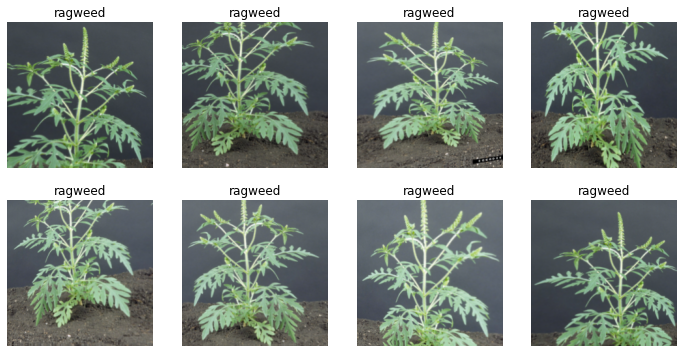

In [17]:
# initiate a new data block container
# tranform images using RandomResizedCrop
# transform image batches using aug_transforms
# create data loader with data path
# visualize train images with image augmentation

nasis = nasis.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = nasis.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [19]:
# create a cnn learner with resnet18 architecture
# use the data loader as input
# set error_rate as the metric
# train for 10 epochs

learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.921451,1.704495,0.625000,00:14


epoch,train_loss,valid_loss,error_rate,time
0,1.214782,1.006953,0.392857,00:13
1,0.990808,0.688476,0.196429,00:13
2,0.833996,0.634197,0.160714,00:14
3,0.730438,0.656205,0.160714,00:13
4,0.641331,0.652969,0.160714,00:13
5,0.555492,0.641156,0.160714,00:13
6,0.503537,0.622204,0.142857,00:13
7,0.452058,0.604674,0.142857,00:13
8,0.419968,0.587828,0.142857,00:13
9,0.390773,0.569017,0.142857,00:14


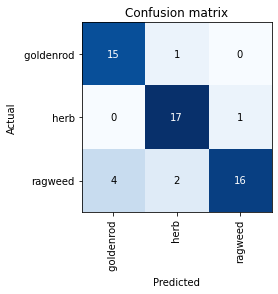

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

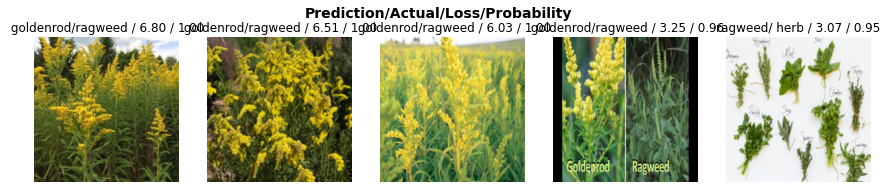

In [21]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
#cleaner = ImageClassifierCleaner(learn)
#cleaner

In [ ]:
#for idx in cleaner.delete(): cleaner.fns[idx].unlink()
#for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

Export learned model

In [26]:
learn.export()

In [27]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

Predict test images using the trained model

In [28]:
learn_inf = load_learner(path/'export.pkl')

In [29]:
learn_inf.predict('/content/downloads/ goldenrod/17.1200px-solidago_virgaurea_var._leiocarpa_02-2.jpg')

(' herb', tensor(1), tensor([0.2973, 0.6966, 0.0061]))

In [30]:
learn_inf.dls.vocab

(#3) [' goldenrod',' herb','ragweed']

 Install the Voila library to make Jupyter Notebook as a webapp

In [ ]:
!pip install voila
!jupyter serverextension enable voila —sys-prefix